# Proyek Analisis Data: [Air Quality]
- **Nama:** Muhammad Nafiis Fawwaz Al Farisi
- **Email:** muhammadnafiisfawwazalfarisi@gmail.com
- **ID Dicoding:** fawwazalfarisi

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara tingkat polusi udara (PM2.5, PM10) dan suhu?
- Apakah ada pola musiman dalam tingkat polusi udara?


## Import Semua Packages/Library yang Digunakan

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


## Data Wrangling

### Gathering Data

In [16]:
folder_path = "data"
output_folder = "dashboard"
os.makedirs(output_folder, exist_ok=True)

all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
df_list = []

for file in all_files:
    df = pd.read_csv(file, sep=",", engine="python", skipinitialspace=True)
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)
data.head()



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Data berhasil digabungkan dari beberapa file CSV
- Terdapat beberapa kolom yang mungkin memiliki data yang tidak bersih

### Assessing Data

In [17]:
print("Informasi Data:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe())

print("\nJumlah Missing Values:")
print(data.isnull().sum())

print("\nJumlah Data Duplikat:")
print(data.duplicated().sum())

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None

Statistik Deskriptif:
 

**Insight:**
- Beberapa kolom memiliki missing values
- Tipe data belum semuanya sesuai dengan kebutuhan analisis

### Cleaning Data

In [18]:
numeric_cols = ["year", "month", "day", "hour", "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

data["date"] = pd.to_datetime(data[["year", "month", "day", "hour"]])
data.dropna(inplace=True)

output_file = os.path.join(output_folder, "main_data.csv")
data.to_csv(output_file, index=False)

**Insight:**
- Missing values telah dihapus
- Kolom `date` berhasil dibuat untuk analisis berbasis waktu

## Exploratory Data Analysis (EDA)

### Explore ...

Non-numeric columns: Index(['wd', 'station'], dtype='object')


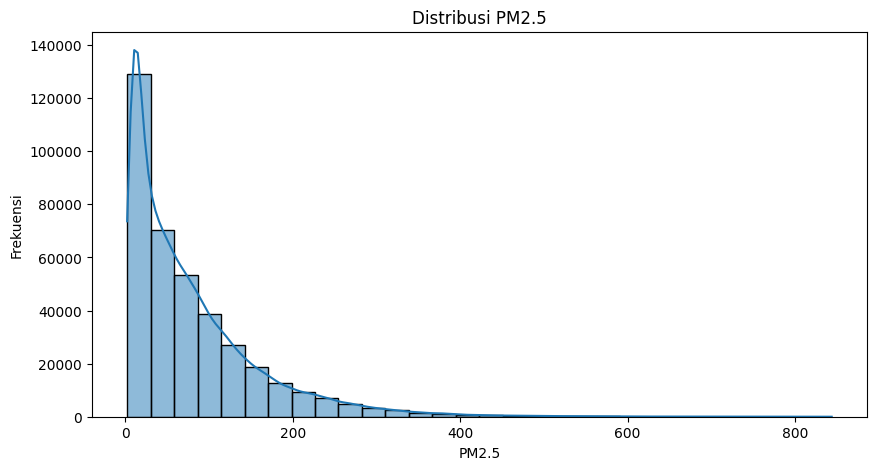

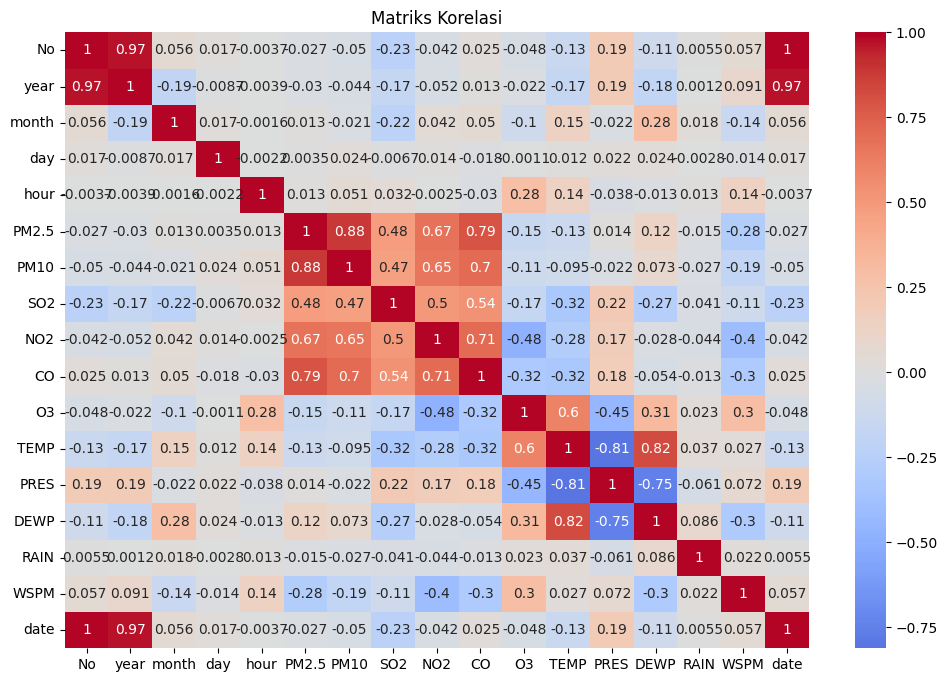

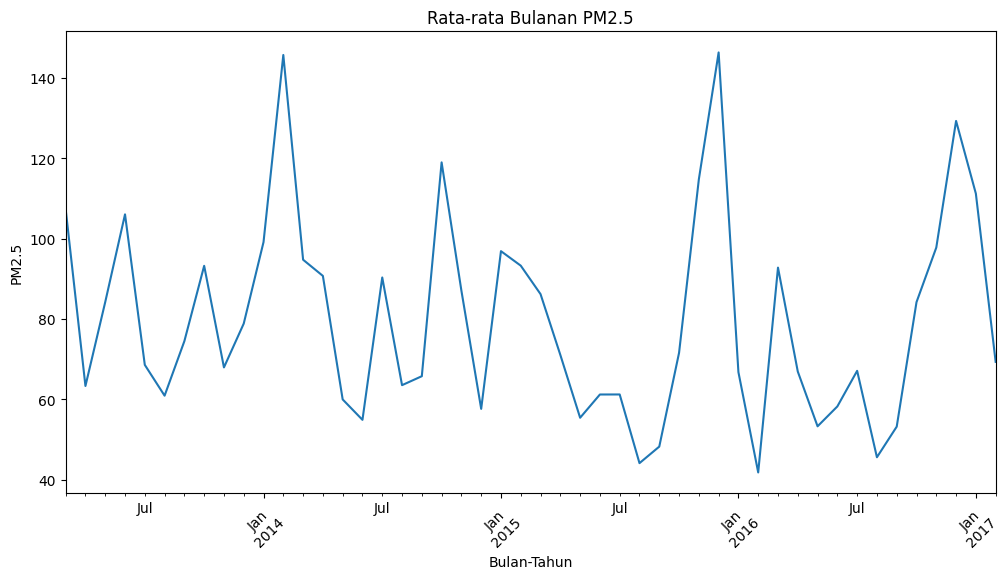

In [19]:
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)
numeric_data = data.select_dtypes(exclude=['object'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 5))
sns.histplot(data['PM2.5'].dropna(), bins=30, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.show()


data['month_year'] = data['date'].dt.to_period('M')
pm25_monthly = data.groupby('month_year')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
pm25_monthly.plot()
plt.title('Rata-rata Bulanan PM2.5')
plt.xlabel('Bulan-Tahun')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()



**Insight:**
- dicek apakah kolom non-numerik perlu diubah menjadi numerik atau dihapus jika tidak relevan.

- Mengamati tren musiman atau perubahan rata-rata PM2.5 dari waktu ke waktu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara tingkat polusi udara (PM2.5, PM10) dan suhu?

          PM2.5      PM10      TEMP
PM2.5  1.000000  0.884324 -0.128907
PM10   0.884324  1.000000 -0.094793
TEMP  -0.128907 -0.094793  1.000000


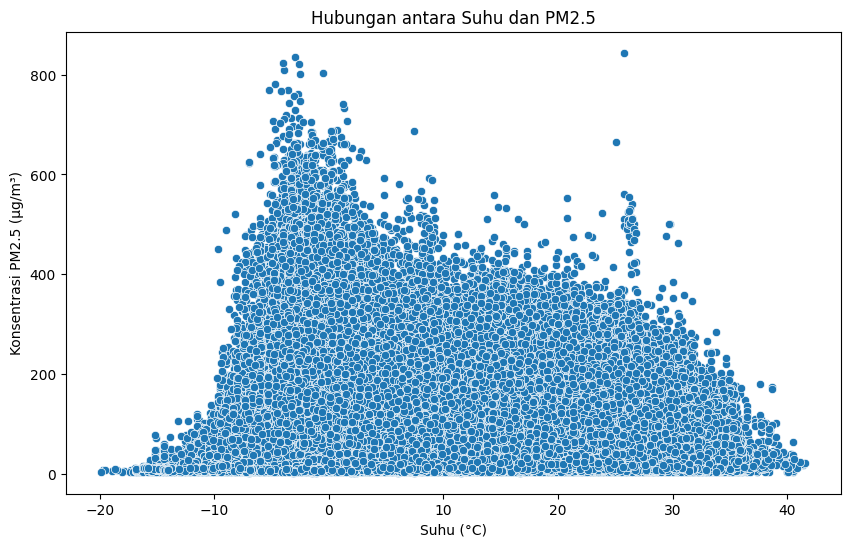

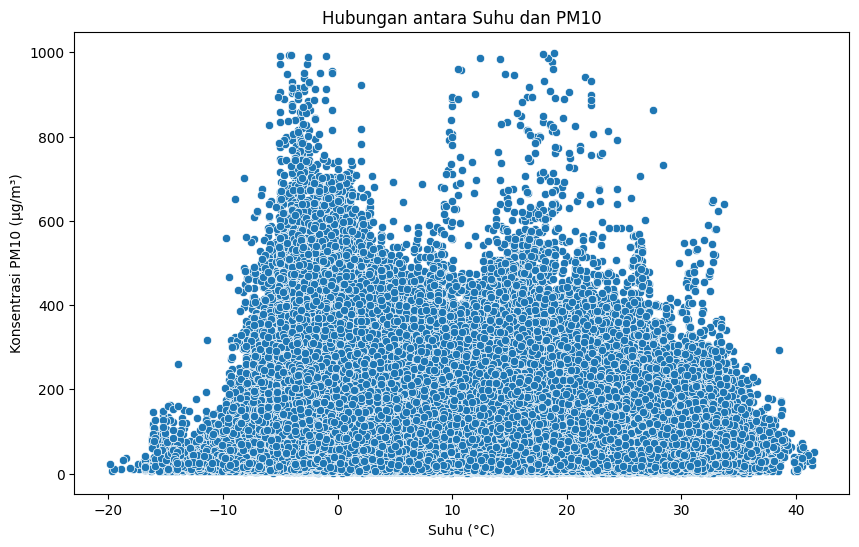

In [20]:
correlation = data[['PM2.5', 'PM10', 'TEMP']].corr()
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TEMP'], y=data['PM2.5'])
plt.title('Hubungan antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TEMP'], y=data['PM10'])
plt.title('Hubungan antara Suhu dan PM10')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.show()

### Pertanyaan 2: Apakah ada pola musiman dalam tingkat polusi udara?


C:\Users\ACER\AppData\Local\Temp\ipykernel_14980\160030138.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['PM2.5'].resample('M').mean()


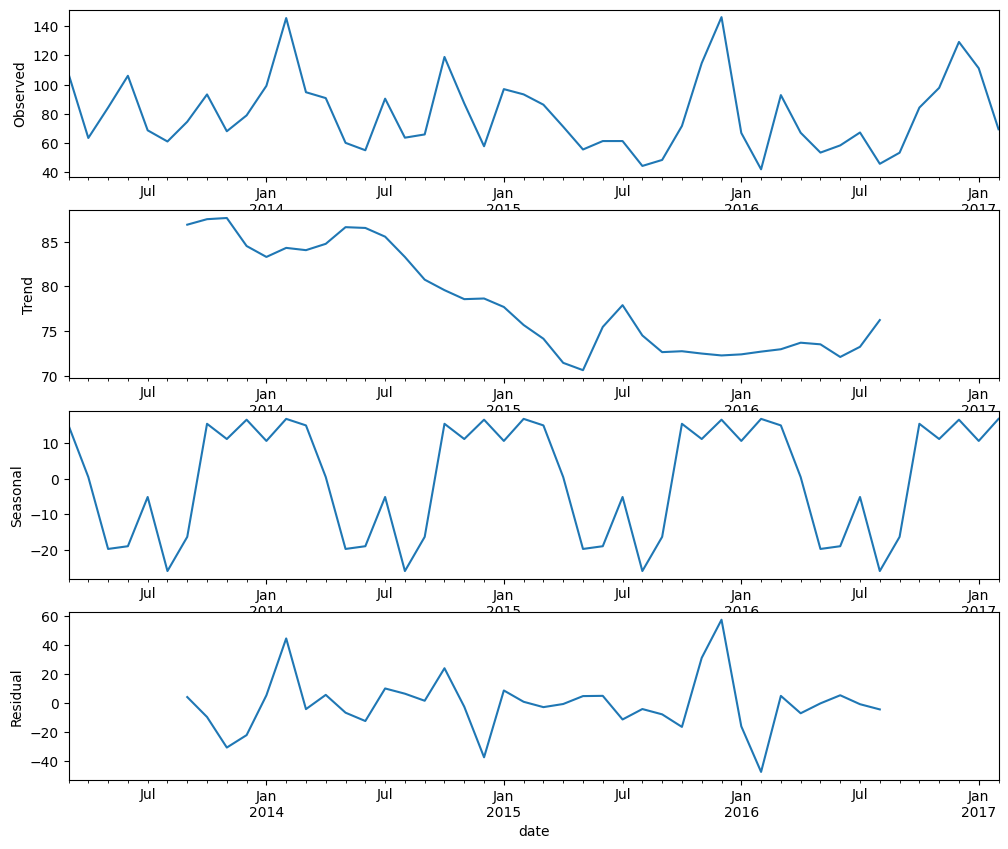

In [21]:

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

monthly_data = data['PM2.5'].resample('M').mean()

decomposition = seasonal_decompose(monthly_data.dropna(), model='additive')

# Plot hasil dekomposisi
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()

**Insight:**
- Dilakukan korelasi antara PM2.5, PM10, dan suhu.
- Visualisasi menggunakan scatter plot untuk melihat hubungan antara suhu dan polutan udara.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kualitas udara dipengaruhi oleh berbagai faktor lingkungan, termasuk suhu dan pola musiman.
- Analisis ini dapat digunakan untuk perencanaan kebijakan lingkungan yang lebih baik, seperti tindakan mitigasi polusi pada periode dengan tingkat polutan tinggi.
- Langkah selanjutnya bisa mencakup analisis lebih dalam dengan mempertimbangkan variabel lain seperti kelembaban, tekanan udara, dan sumber emisi utama untuk mendapatkan gambaran yang lebih lengkap mengenai faktor-faktor yang memengaruhi kualitas udara.